In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd
import numpy as np

In [5]:
%matplotlib inline

In [6]:
df = pd.read_csv('/content/911.csv')

In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [9]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [10]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [11]:
df['title'].nunique()

110

In [12]:
len(df['title'].unique())

110

In [13]:
x = df['title'].iloc[0]

In [14]:
x.split(':')[0]

'EMS'

In [15]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [16]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<ipython-input-17-418b8fd56ce1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'Reason', data=df, palette='viridis')


<Axes: xlabel='Reason', ylabel='count'>

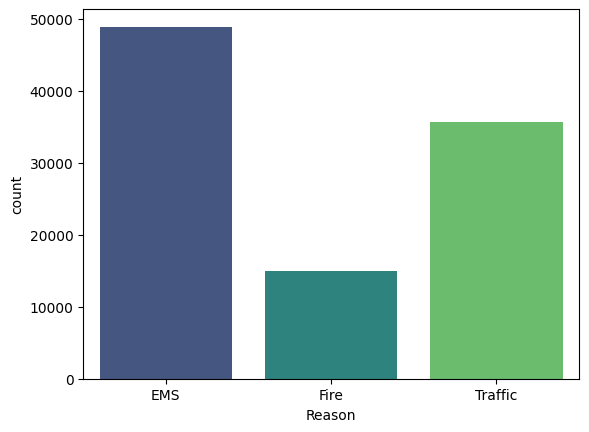

In [17]:
sns.countplot(x= 'Reason', data=df, palette='viridis')

In [18]:
type(df['timeStamp'].iloc[0])

str

In [19]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [20]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [21]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [22]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [23]:
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [24]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [25]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'sat', 6:'Sun'}

In [26]:
df['Day of week'] = df['Day of week'].map(dmap)

In [27]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


<Axes: xlabel='Day of week', ylabel='count'>

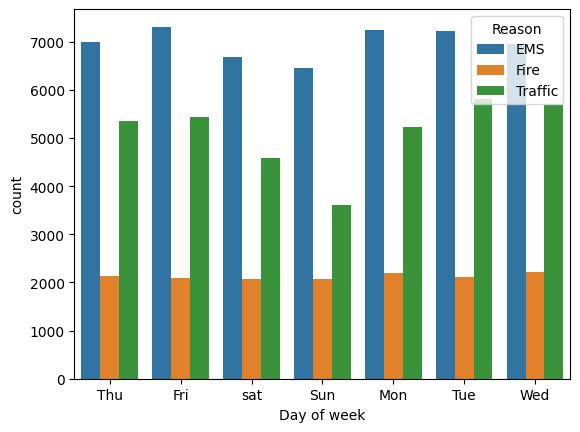

In [28]:
sns.countplot(x = 'Day of week', data=df, hue='Reason')

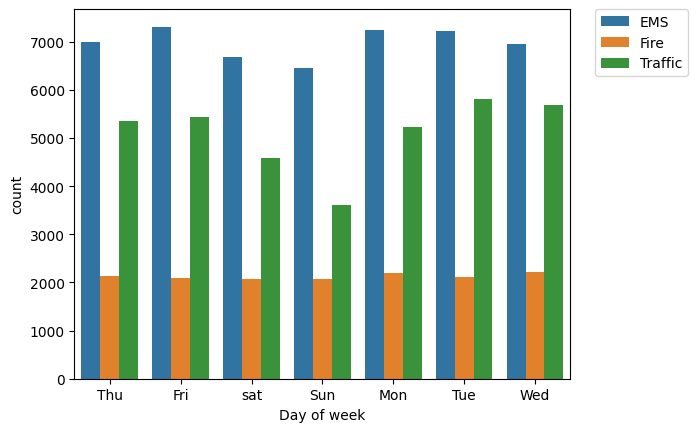

In [29]:
sns.countplot(x = 'Day of week', data=df, hue='Reason')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

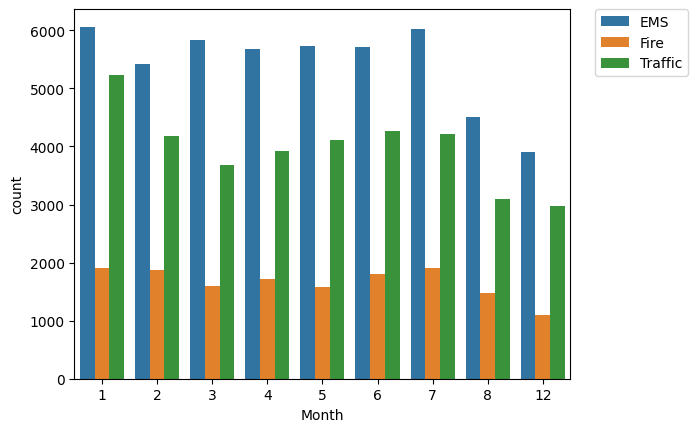

In [34]:
sns.countplot(x = 'Month', data=df, hue='Reason')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

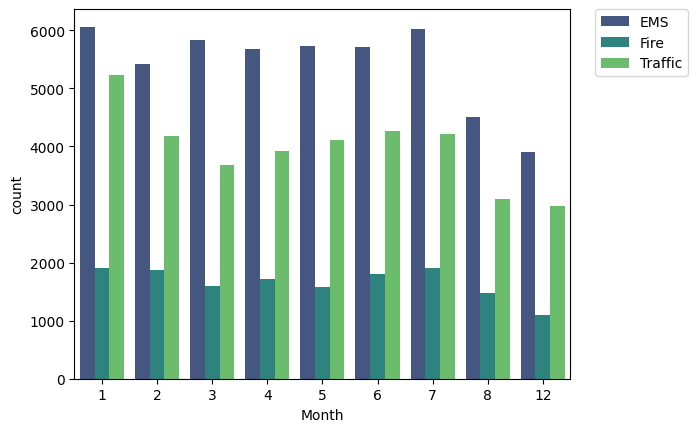

In [36]:
sns.countplot(x = 'Month', data=df, hue='Reason', palette='viridis')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [37]:
byMonth = df.groupby('Month').count()

In [32]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


<Axes: xlabel='Month'>

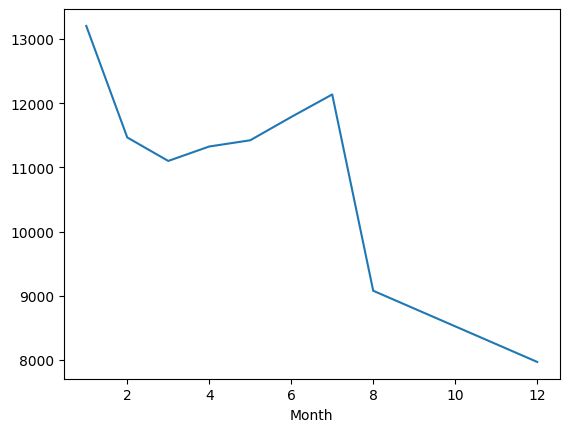

In [33]:
byMonth['lat'].plot()

<ipython-input-39-9e8035e6ee09>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Month', data=df, palette='viridis')


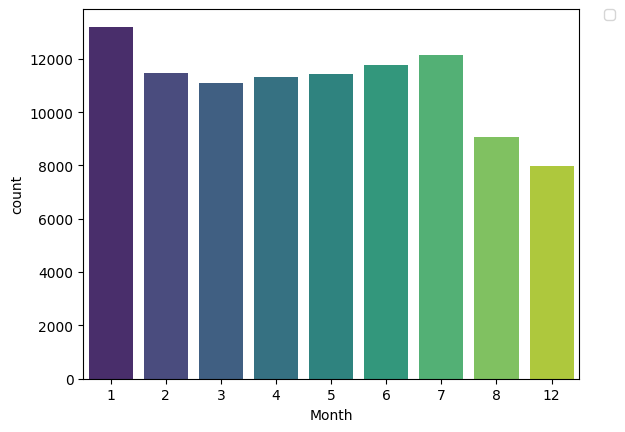

In [39]:
sns.countplot(x = 'Month', data=df, palette='viridis')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

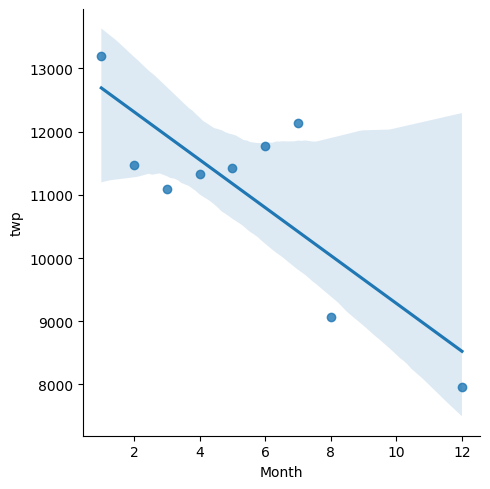

In [40]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

In [42]:
t = df['timeStamp'].iloc[0]

In [46]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

In [49]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10


In [48]:
df.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


<Axes: xlabel='Date'>

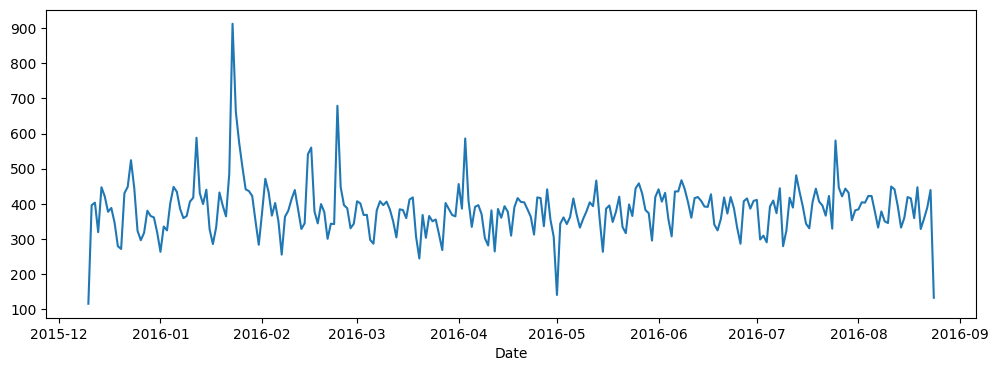

In [52]:
df.groupby('Date').count()['lat'].plot(figsize=(12, 4))

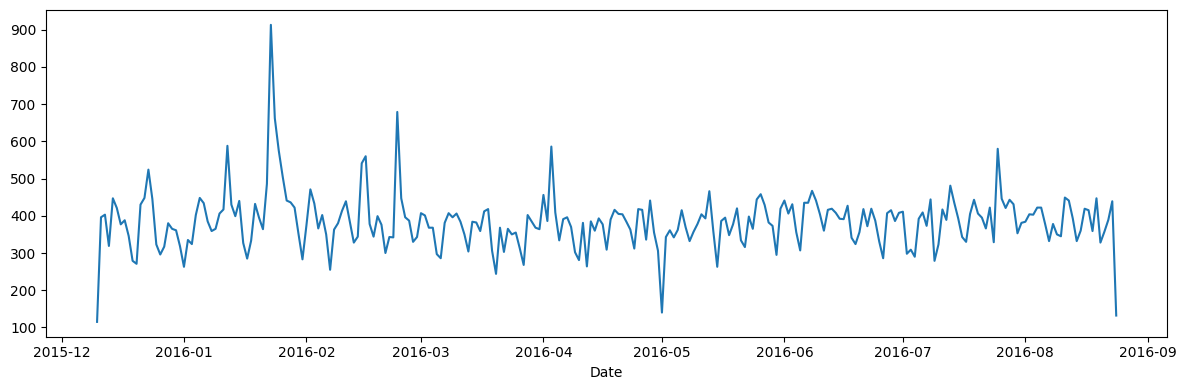

In [54]:
df.groupby('Date').count()['lat'].plot(figsize=(12, 4))

plt.tight_layout()

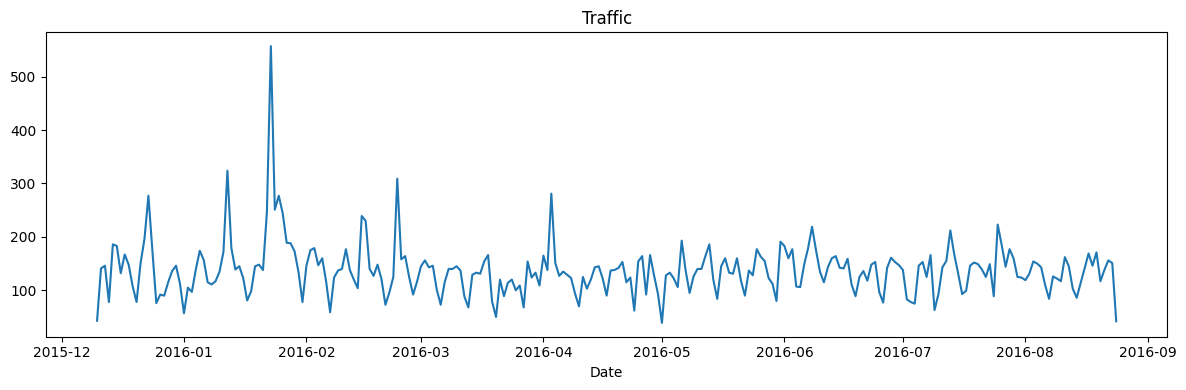

In [56]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['lat'].plot(figsize=(12, 4))

plt.title('Traffic')
plt.tight_layout()

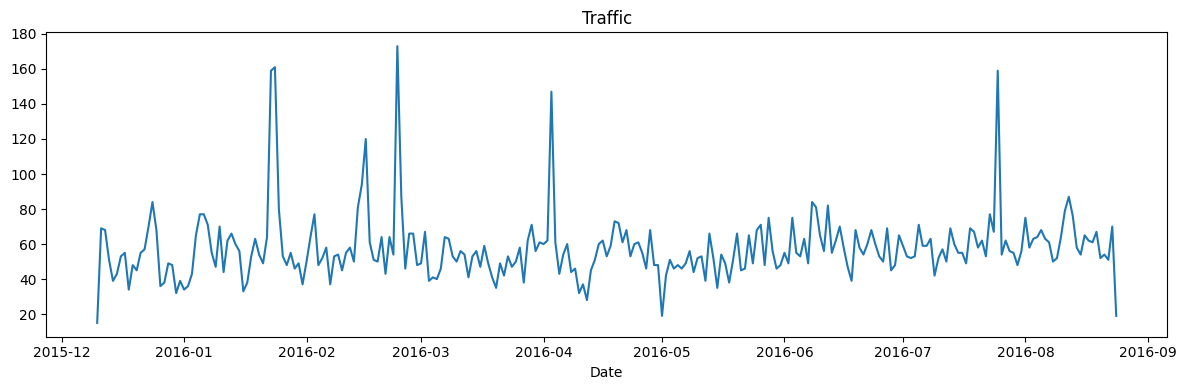

In [57]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['lat'].plot(figsize=(12, 4))

plt.title('Traffic')
plt.tight_layout()

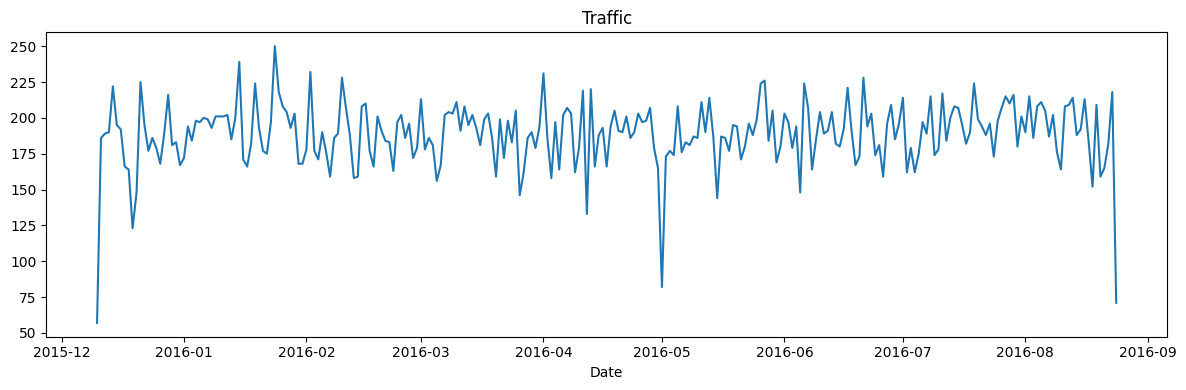

In [58]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['lat'].plot(figsize=(12, 4))

plt.title('Traffic')
plt.tight_layout()

In [69]:
dayHour = df.groupby(by=['Day of week', 'Hour']).count()["Reason"].unstack()

In [66]:
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274


<Axes: xlabel='Hour', ylabel='Day of week'>

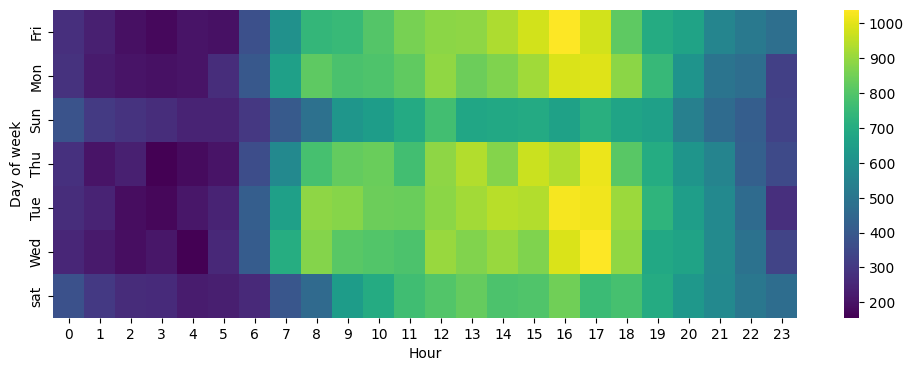

In [72]:
plt.figure(figsize=(12, 4))

sns.heatmap(dayHour, cmap='viridis')

<Figure size 1200x400 with 0 Axes>

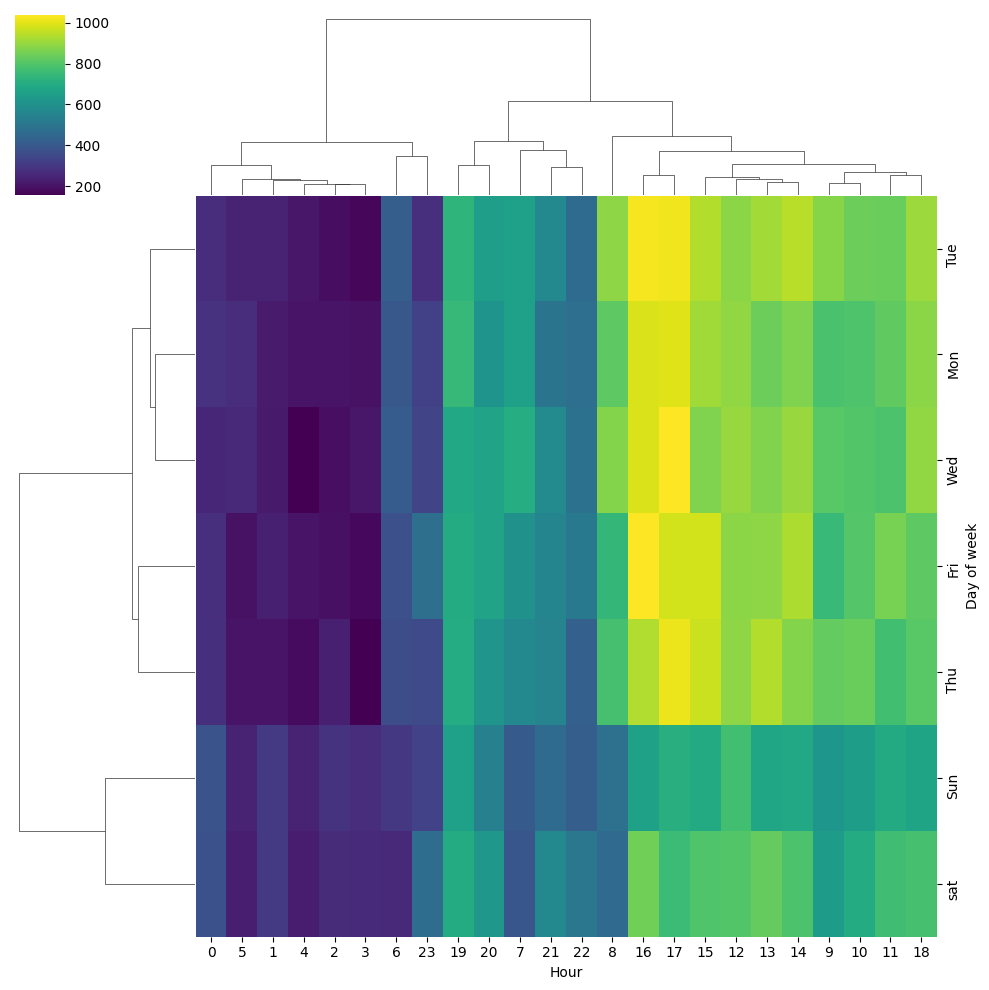

In [68]:
plt.figure(figsize=(12, 4))

sns.clustermap(dayHour, cmap='viridis')

In [70]:
dayMonth = df.groupby(by=['Day of week', 'Month']).count()["Reason"].unstack()

In [73]:
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234


<Axes: xlabel='Month', ylabel='Day of week'>

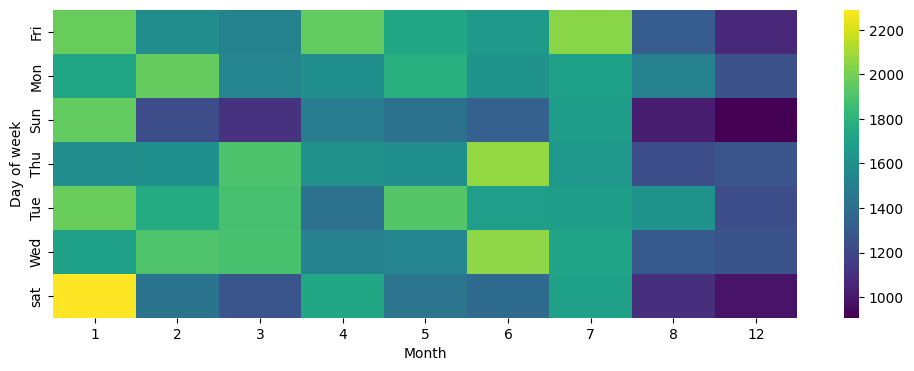

In [75]:
plt.figure(figsize=(12, 4))

sns.heatmap(dayMonth, cmap='viridis')

<Figure size 1200x400 with 0 Axes>

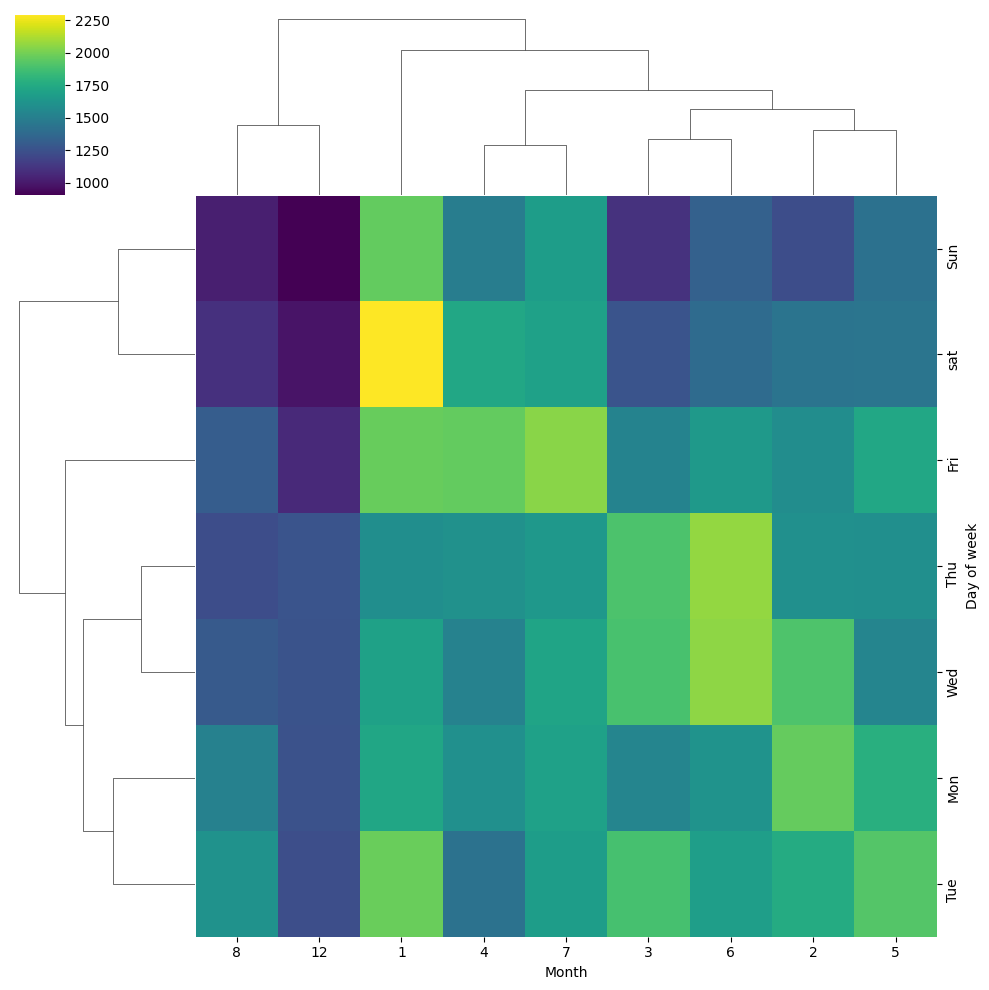

In [76]:
plt.figure(figsize=(12, 4))

sns.clustermap(dayMonth, cmap='viridis')